In [59]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
# import data
df_train = pd.read_excel("/home/darshan/Desktop/Codes/IMP_Jupyter_Notebooks/data/Flight Prediction/Data_Train.xlsx")
df_test = pd.read_excel("/home/darshan/Desktop/Codes/IMP_Jupyter_Notebooks/data/Flight Prediction/Test_set.xlsx")

In [61]:
print(df_train.shape)
print(df_test.shape)

(10683, 11)
(2671, 10)


In [62]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [63]:
final_df = df_train.append(df_test)

In [64]:
final_df.shape

(13354, 11)

In [65]:
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


### feature engineering

In [66]:
final_df['Date_of_Journey'].str.split("/").str[0]

0       24
1        1
2        9
3       12
4       01
        ..
2666     6
2667    27
2668     6
2669     6
2670    15
Name: Date_of_Journey, Length: 13354, dtype: object

In [67]:
final_df["day"] = final_df['Date_of_Journey'].str.split("/").str[0].astype(int)
final_df["month"] = final_df['Date_of_Journey'].str.split("/").str[1].astype(int)
final_df["year"] = final_df['Date_of_Journey'].str.split("/").str[2].astype(int)

final_df.drop(["Date_of_Journey"],axis=1,inplace=True)

In [68]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [69]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  day              13354 non-null  int64  
 11  month            13354 non-null  int64  
 12  year             13354 non-null  int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 1.4+ MB


In [70]:
# final_df["Arrival_Time"].str.split(" ")[0]
final_df["Arrival_Time"] = final_df["Arrival_Time"].apply(lambda x:x.split(" ")[0])
final_df["Dep_Time"] = final_df["Dep_Time"].apply(lambda x:x.split(" ")[0])


In [71]:
final_df["Arrival_hour"] = final_df["Arrival_Time"].apply(lambda x:x.split(":")[0]).astype(int)
final_df["Arrival_minute"] = final_df["Arrival_Time"].apply(lambda x:x.split(":")[1]).astype(int)

final_df["Dep_hour"] = final_df["Dep_Time"].apply(lambda x:x.split(":")[0]).astype(int)
final_df["Dep_minute"] = final_df["Dep_Time"].apply(lambda x:x.split(":")[1]).astype(int)

final_df.drop(["Arrival_Time"],axis=1,inplace=True)

In [72]:
final_df.drop(["Dep_Time"],axis=1,inplace=True)

In [73]:
final_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50


In [74]:
final_df.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
day                   0
month                 0
year                  0
Arrival_hour          0
Arrival_minute        0
Dep_hour              0
Dep_minute            0
dtype: int64

In [75]:
final_df["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [76]:
final_df["Total_Stops"] = final_df["Total_Stops"].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3, '4 stops':4,'nan':2})

In [77]:
final_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50


In [78]:
final_df.drop(['Route'],axis=1,inplace=True)

In [79]:
final_df.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,day,month,year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25


In [80]:
final_df["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [93]:
final_df['Duration_hour']=final_df['Duration'].str.split(" ").str[0].str.split('h').str[0]
# Duration

In [104]:
final_df[final_df["Duration_hour"] == "5m"]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,day,month,year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hour


In [100]:
final_df.drop(final_df[final_df["Duration_hour"] == "5m"].index,axis=0,inplace=True)

In [101]:
final_df['Duration_hour'] = final_df['Duration_hour'].astype(int)

In [105]:
final_df[final_df["Duration_hour"] == "5m"]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,day,month,year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hour


In [156]:
final_df['Duration_minute']=final_df['Duration'].str.split(" ").str[1].str.split('m').str[0]

In [157]:
duration_min = final_df['Duration_minute'].unique()

               variable value
200265  Duration_minute    50
200266  Duration_minute    25
200267  Duration_minute   NaN
200268  Duration_minute    25
200269  Duration_minute    45
...                 ...   ...
213611  Duration_minute    55
213612  Duration_minute    35
213613  Duration_minute    35
213614  Duration_minute    15
213615  Duration_minute    20

[13351 rows x 2 columns]


<AxesSubplot:xlabel='variable', ylabel='count'>

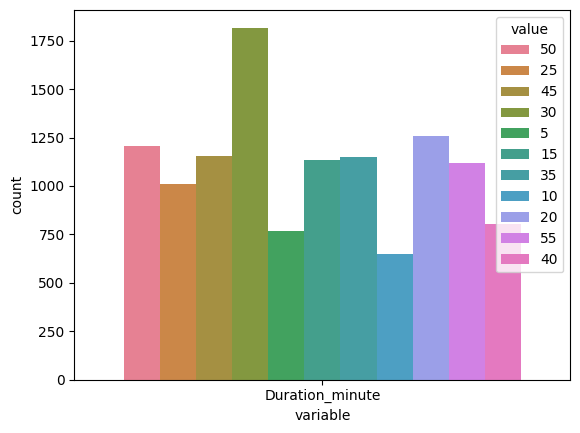

In [167]:
df = pd.melt(final_df)
print(df[df["variable"] == "Duration_minute"])
sns.countplot(data=df[df["variable"] == "Duration_minute"],x='variable', hue='value')

In [179]:
final_df.isnull().sum()

Airline               0
Source                0
Destination           0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2670
day                   0
month                 0
year                  0
Arrival_hour          0
Arrival_minute        0
Dep_hour              0
Dep_minute            0
Duration_hour         0
Duration_minute       0
dtype: int64

In [180]:
final_df["Total_Stops"] = final_df["Total_Stops"].fillna(2)
final_df["Duration_minute"] = final_df["Duration_minute"].fillna(0)

In [181]:
final_df.isnull().sum()

Airline               0
Source                0
Destination           0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2670
day                   0
month                 0
year                  0
Arrival_hour          0
Arrival_minute        0
Dep_hour              0
Dep_minute            0
Duration_hour         0
Duration_minute       0
dtype: int64

In [183]:
final_df.drop(["Duration"],axis=1,inplace=True)

In [185]:
final_df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [188]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

final_df["Airline"]= labelencoder.fit_transform(final_df["Airline"])
final_df["Source"]= labelencoder.fit_transform(final_df["Source"])
final_df["Destination"]= labelencoder.fit_transform(final_df["Destination"])
final_df["Additional_Info"]= labelencoder.fit_transform(final_df["Additional_Info"])

In [189]:
final_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,day,month,year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hour,Duration_minute
0,3,0,5,0.0,8,3897.0,24,3,2019,1,10,22,20,2,50
1,1,3,0,2.0,8,7662.0,1,5,2019,13,15,5,50,7,25
2,4,2,1,2.0,8,13882.0,9,6,2019,4,25,9,25,19,30
3,3,3,0,1.0,8,6218.0,12,5,2019,23,30,18,5,5,25
4,3,0,5,1.0,8,13302.0,1,3,2019,21,35,16,50,4,45


In [ ]:
# we can use OneHotEncoding